# Udacity Data Scientist Nanodegree - Project 1
*Exploration of data from a 2019 Stack Overflow Survey, folowing the CRISP-DM data mining standard*

B. W., January 2020 

## Business Understanding

Data gathered during the Stack Overflow survey has an abundance of data regarding programmers backgrounds, carreers, interests and job satisfaction. This information is of interest to myself, because I am heading into this industry. The following questions are of interest: 

1. How important are open source tools to Github users?
2. How satisfied are Github users with their careers?
3. Are there trends for Github user's salaries? 


## Data Understanding

Survey results for 2019 were downloaded from Github as `survey_results_public.csv`. An explanation of the column labels is given `survey_results_schema.csv` in the git repository. 

### Data Import

In [8]:
# import relevant libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# import and make a copy of survey data 
df_original = pd.read_csv("./data/survey_results_public.csv")
df = df_original.copy()

### Assessment

In [10]:
# get a first pass understanding of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
Respondent                88883 non-null int64
MainBranch                88331 non-null object
Hobbyist                  88883 non-null object
OpenSourcer               88883 non-null object
OpenSource                86842 non-null object
Employment                87181 non-null object
Country                   88751 non-null object
Student                   87014 non-null object
EdLevel                   86390 non-null object
UndergradMajor            75614 non-null object
EduOther                  84260 non-null object
OrgSize                   71791 non-null object
DevType                   81335 non-null object
YearsCode                 87938 non-null object
Age1stCode                87634 non-null object
YearsCodePro              74331 non-null object
CareerSat                 72847 non-null object
JobSat                    70988 non-null object
MgrIdiot                  61

In [13]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In order to answer the questions asked above, not all columns are necessary. Redundant columns in this dataset shall be removed. Then columns shall be converted into appropriate data types and nan and 0 values will be removed, if necessary. 

## Data Preparation

In order to answer the above questions, dataframe will be reduced to revelvant columns only. 
for Q1, relevant columns are 'OpenSourcer', 'OpenSource', 'DevEnviron' and 'OpSys'.

Data for Q1: How important are open source tools to Github users?

For this section we will look at how often users contribute to open source (OpenSourcer), the perceived quality of open source software (OpenSource) and the preference of operating system and the popularity of Linux in particular (OpSys). 

In [14]:
# columns relevant to open source (Q1)
df_open_source = df[['OpenSourcer', 'OpenSource', 'DevEnviron', 'OpSys']]

# columns relevant to career satisfaction


# columns relevant to evaluating trends in salaries


''

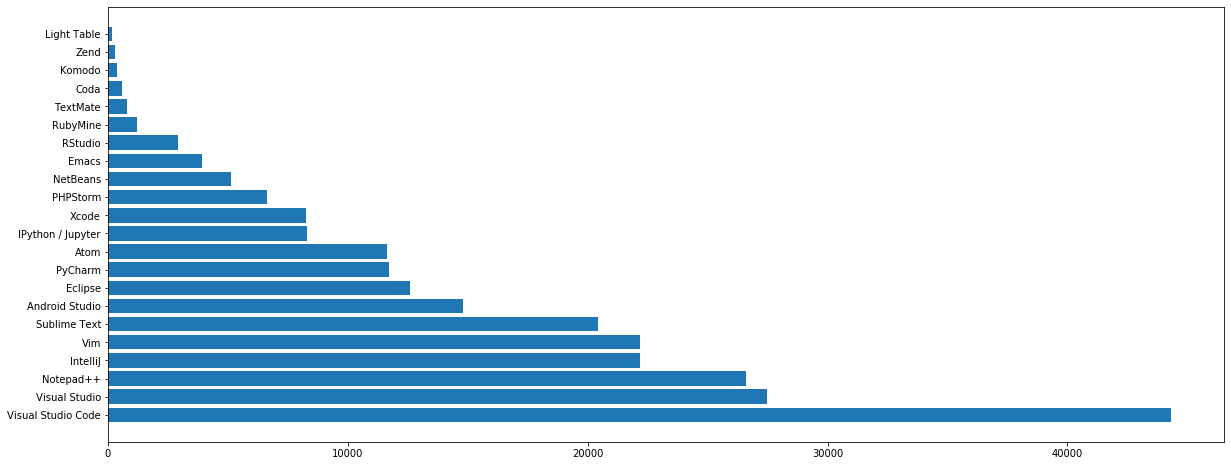

In [41]:
enviro = df['DevEnviron'].str.split(pat=';', expand=True).unstack().value_counts()

fig, ax = plt.subplots(figsize=(20, 8))
ax.barh(enviro.index, width=enviro)
;

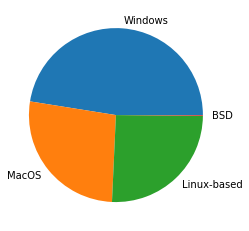

In [46]:
plt.pie(df['OpSys'].value_counts(), labels=df['OpSys'].value_counts().index);

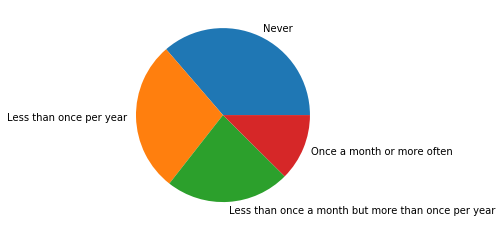

In [125]:
plt.pie(df['OpenSourcer'].value_counts(), labels = df['OpenSourcer'].value_counts().index);

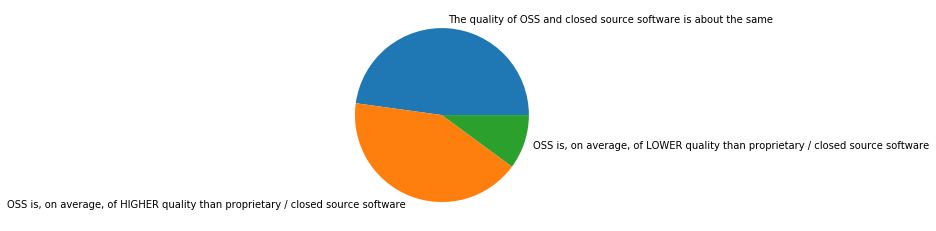

In [43]:
plt.pie(df['OpenSource'].value_counts(), labels = df['OpenSource'].value_counts().index);

In [47]:
df_background = df[['Country', 'Student', 'EdLevel', 'UndergradMajor', 'Age', 'Gender']]

''

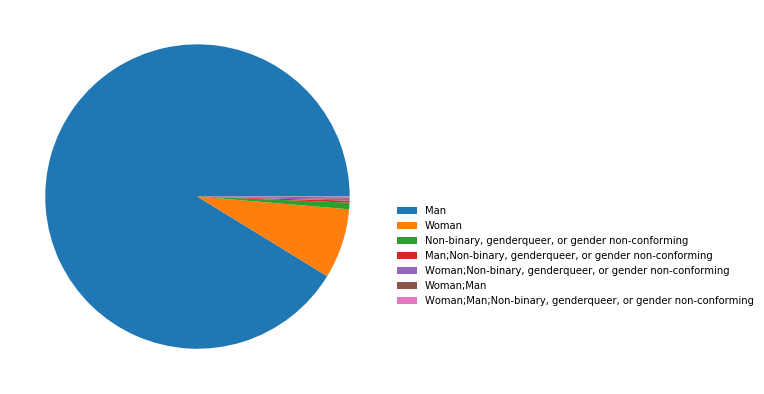

In [132]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(df['Gender'].value_counts())
ax.legend(labels=df['Gender'].value_counts().index,  frameon=False, bbox_to_anchor=(1, 0.5))
;

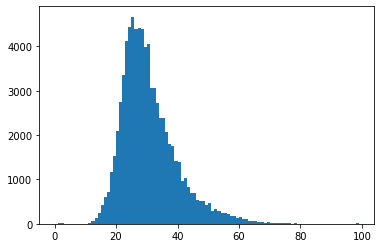

In [124]:
plt.hist(df['Age'], bins=range(0, 100));

''

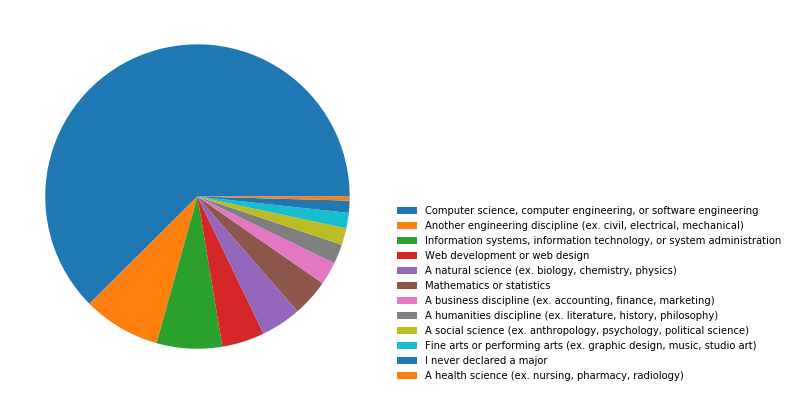

In [104]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(df['UndergradMajor'].value_counts())
ax.legend(labels=df['UndergradMajor'].value_counts().index,  frameon=False, bbox_to_anchor=(1, 0.5))
;

''

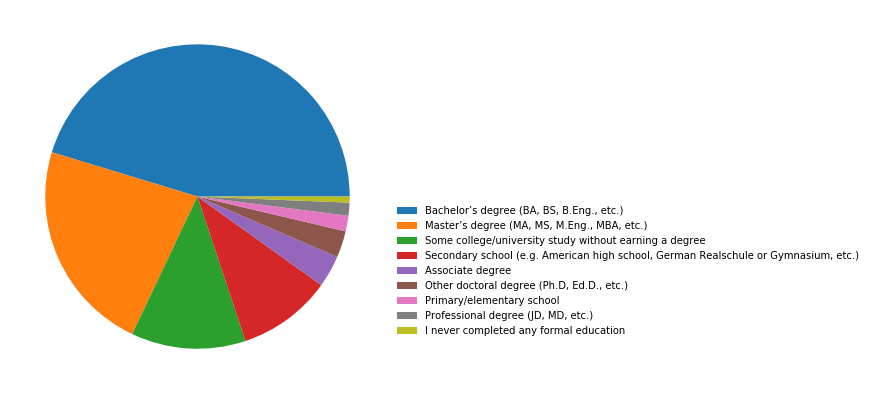

In [103]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(df['EdLevel'].value_counts())
ax.legend(labels=df['EdLevel'].value_counts().index,  frameon=False, bbox_to_anchor=(1, 0.5))
;

''

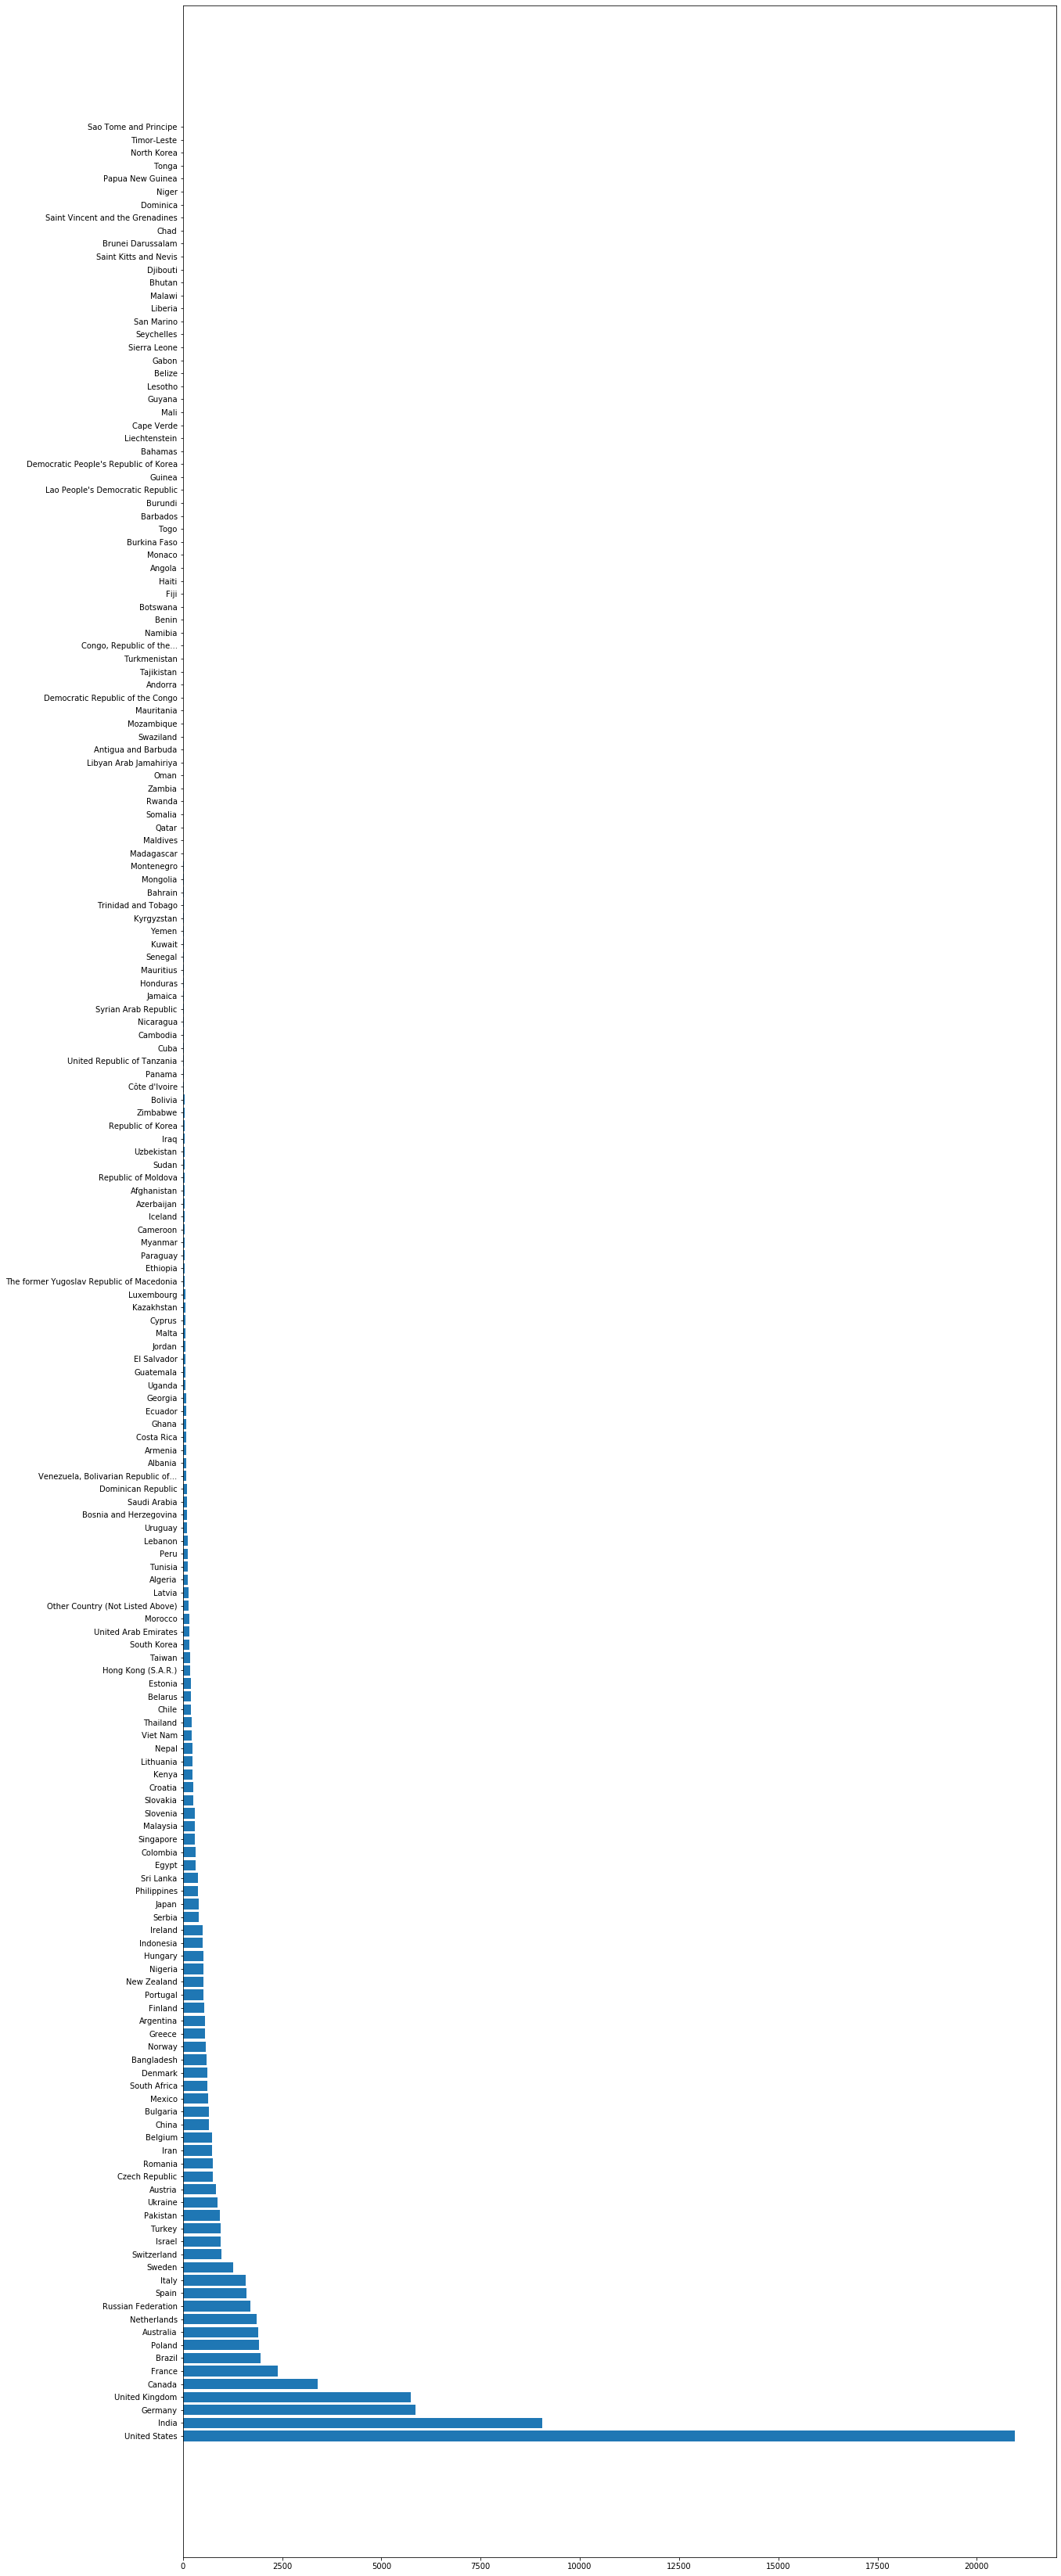

In [55]:
fig, ax = plt.subplots(figsize=(20, 60))
ax.barh(df['Country'].value_counts().index, width=df['Country'].value_counts())
;

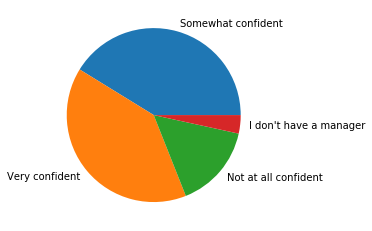

In [138]:
plt.pie(df['MgrIdiot'].value_counts(), labels=df['MgrIdiot'].value_counts().index);

In [154]:
df['CurrencySymbol'].value_counts()

USD    19490
EUR    15386
INR     6690
GBP     4903
CAD     2680
AUD     1624
BRL     1593
PLN     1564
RUB     1349
SEK     1034
CHF      823
ILS      774
TRY      651
CZK      601
PKR      537
IRR      534
ZAR      518
UAH      501
BGN      495
DKK      491
MXN      489
RON      479
NOK      465
CNY      434
NZD      425
ARS      416
HUF      398
BDT      344
JPY      327
IDR      318
       ...  
BZD        3
AWG        3
OMR        3
MRU        3
BBD        3
GNF        3
BIF        3
IMP        2
BSD        2
TMT        2
SZL        2
SRD        2
LAK        2
LSL        2
BND        2
KHR        2
CDF        2
VUV        2
non        2
SLL        2
BTN        1
SOS        1
KYD        1
MWK        1
SCR        1
GYD        1
FKP        1
CVE        1
WST        1
GGP        1
Name: CurrencySymbol, Length: 143, dtype: int64

''

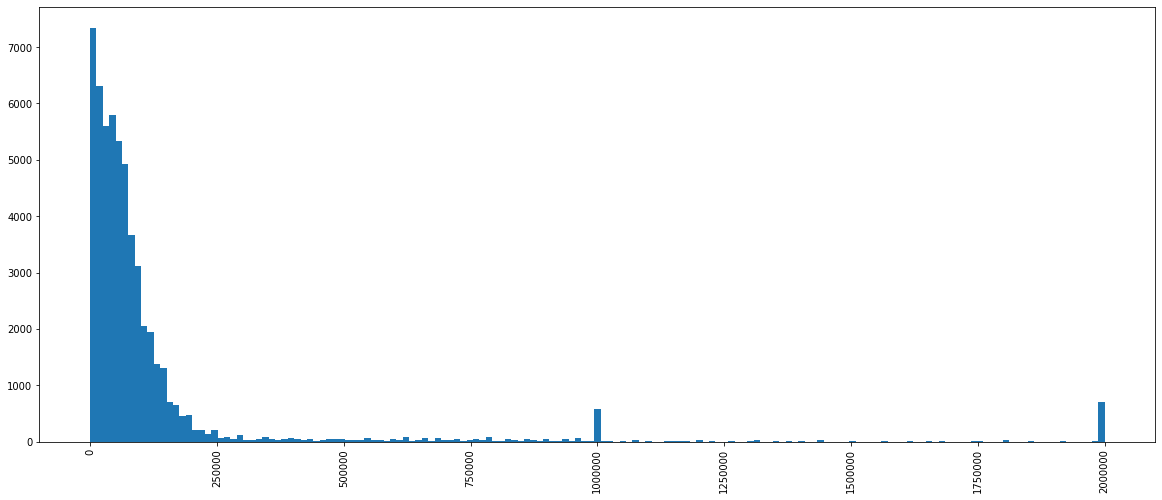

In [270]:
fig, ax = plt.subplots(figsize=(20, 8))

ax.hist(df['ConvertedComp'], bins=np.linspace(0, 2000000, 160))
ax.tick_params(axis='x', labelrotation=90)

;

''

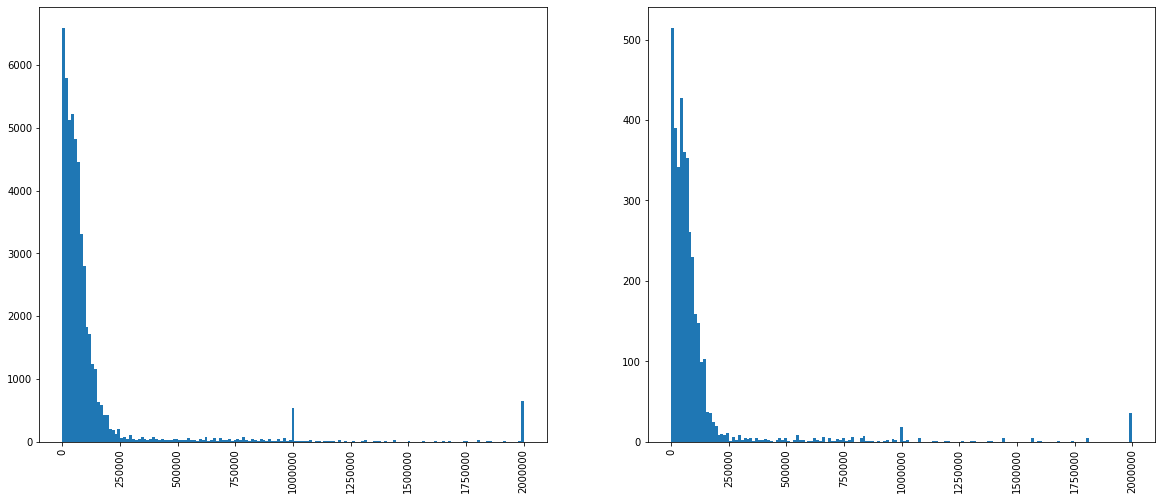

In [510]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 8))

axs[0].hist(df[df['Gender']=='Man']['ConvertedComp'], bins=np.linspace(0, 2000000, 160))
axs[1].hist(df[df['Gender']=='Woman']['ConvertedComp'], bins=np.linspace(0, 2000000, 160))
axs[0].tick_params(axis='x', labelrotation=90)
axs[1].tick_params(axis='x', labelrotation=90)
;

''

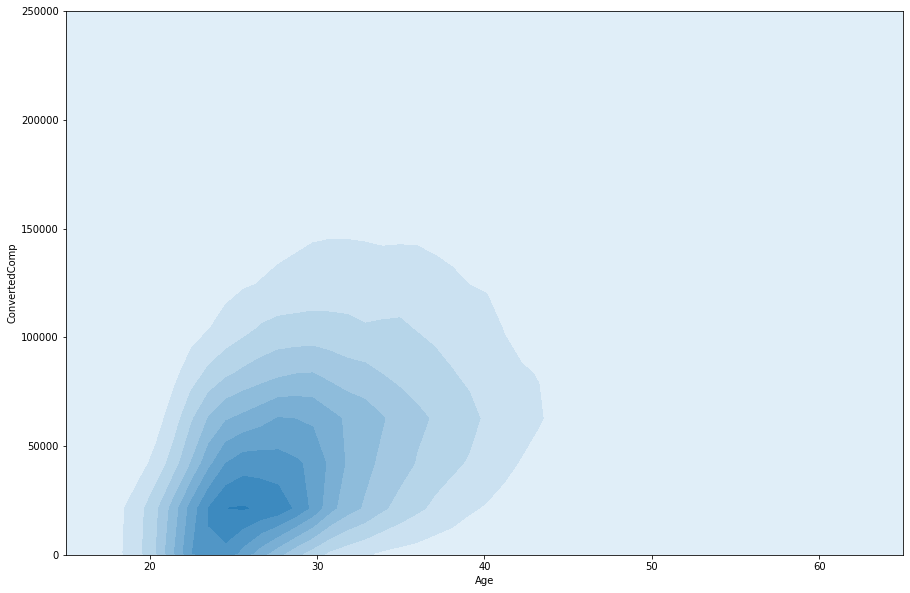

In [511]:
fig, ax = plt.subplots(figsize=(15, 10))
dfplt = df.dropna(subset=['Age', 'ConvertedComp'])
ax = sns.kdeplot(dfplt['Age'], dfplt['ConvertedComp'], shade=True, legend=True)
#ax.scatter(dfplt['Age'], dfplt['ConvertedComp'], s=1, color="b")
ax.set_xlim(left=15, right=65)
ax.set_ylim(top=250000, bottom=0)
;

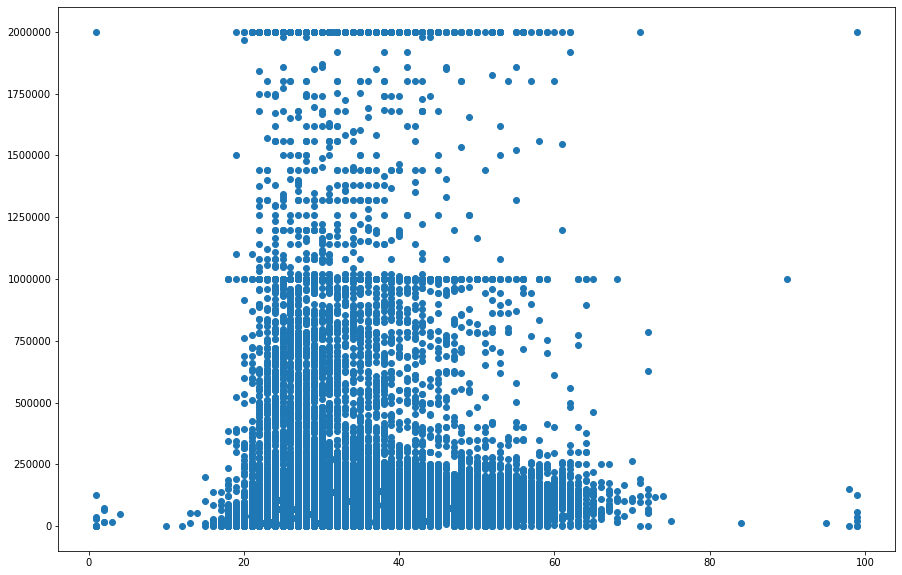

In [271]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(df['Age'], df['ConvertedComp'])

In [460]:
test = df.groupby('Country')

test = test.filter(lambda x: len(x)>=1000 or x.name == 'South Africa')
test.groupby('Country')['ConvertedComp'].median().sort_values(ascending=False).index
#test['Country'].value_counts()

Index(['United States', 'Australia', 'Canada', 'United Kingdom', 'Germany',
       'Netherlands', 'Sweden', 'France', 'Spain', 'South Africa', 'Italy',
       'Poland', 'Russian Federation', 'Brazil', 'India'],
      dtype='object', name='Country')

''

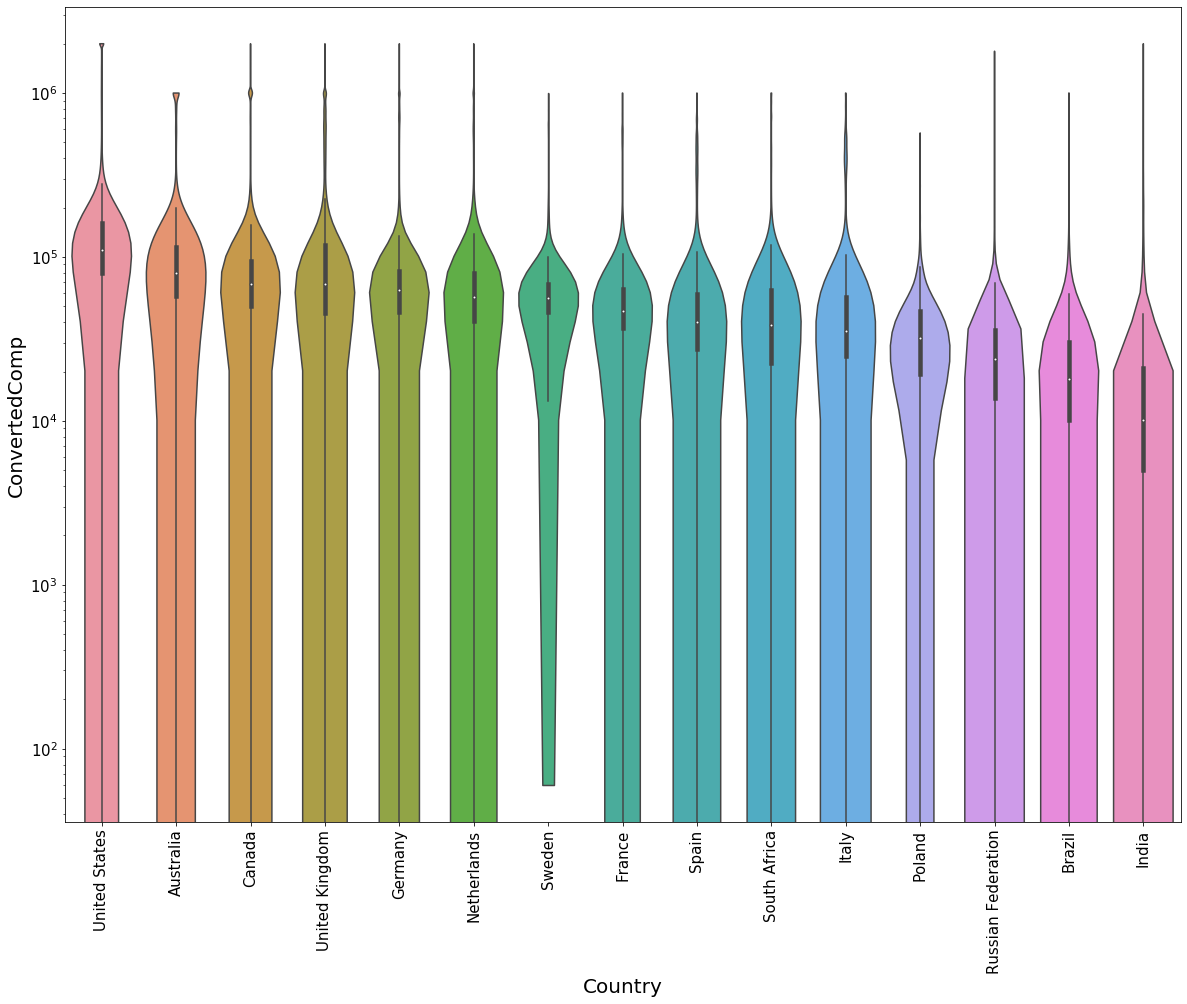

In [461]:
test = df.groupby('Country')
test = test.filter(lambda x: len(x)>=1000 or x.name == 'South Africa')
sorting = test.groupby('Country')['ConvertedComp'].median().sort_values(ascending=False).index

fig, ax = plt.subplots(figsize=(20, 15))
sns.violinplot(x='Country', y='ConvertedComp', data=test, kind='violin', cut=0, scale='width', ax=ax, order=sorting)
ax.set_yscale('log')
ax.tick_params(labelsize=15)
ax.set_xlabel(ax.get_xlabel(), fontsize=20)
ax.set_ylabel(ax.get_ylabel(), fontsize=20)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation='vertical', fontdict={'fontsize':15})
;


In [332]:
(df.groupby('Country').size()>= 1000)

Country
Afghanistan                                     44
Albania                                         86
Algeria                                        134
Andorra                                          7
Angola                                           5
Antigua and Barbuda                              9
Argentina                                      553
Armenia                                         86
Australia                                     1903
Austria                                        839
Azerbaijan                                      49
Bahamas                                          3
Bahrain                                         18
Bangladesh                                     605
Barbados                                         3
Belarus                                        202
Belgium                                        727
Belize                                           3
Benin                                            5
Bhutan                 

In [320]:
test = df[df['Country'].isin(['South Africa', 'Germany', 'Japan'])]
test = test[test['ConvertedComp'].notna()]
test = test[['Country', 'ConvertedComp']]
#test = test.groupby('Country')
#test.unstack()
test = test.melt(id_vars='Country', value_vars='ConvertedComp')
#test #x=test['Country'], height=test['value']
test
#plt.boxplot(test['value'])
#plt.bar(test['value'])

,Country,variable,value
0,Germany,ConvertedComp,57060.0
1,South Africa,ConvertedComp,6300.0
2,Germany,ConvertedComp,20628.0
3,Germany,ConvertedComp,87996.0
4,Germany,ConvertedComp,137490.0
5,Germany,ConvertedComp,52704.0
6,Germany,ConvertedComp,30252.0
7,South Africa,ConvertedComp,21612.0
8,Germany,ConvertedComp,93951.0
9,Germany,ConvertedComp,54996.0


In [299]:
test = df[df['Country'].isin(['South Africa', 'Germany', 'Japan'])]
test = test[test['ConvertedComp'].notna()]

#fig, ax = plt.subplots()
#ax.sns.boxplot(x=test['Country'], y=test['ConvertedComp'])

plt.boxplot(x=test['Country'].unique(), y=test['ConvertedComp'])
#sns.boxplot(x=test['Country'], y=test['ConvertedComp'])
#plt.boxplot(test['ConvertedComp'])

TypeError: boxplot() got an unexpected keyword argument 'y'

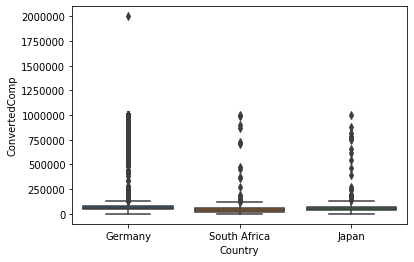

In [296]:
test = df[df['Country'].isin(['South Africa', 'Germany', 'Japan'])]
test = test[test['ConvertedComp'].notna()]

#test = test.groupby('Country')

#plt.boxplot(test['ConvertedComp'])
sns.boxplot(x=test['Country'], y=test['ConvertedComp'])
#plt.boxplot(test['ConvertedComp'])

C:\Users\ben.w\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\ben.w\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\ben.w\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\ben.w\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\ben.w\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


{'whiskers': [<matplotlib.lines.Line2D at 0x1c9f2bf4fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c9f3432668>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c9f2bf4e80>],
 'medians': [<matplotlib.lines.Line2D at 0x1c9f3432dd8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c9f342f080>],
 'means': []}

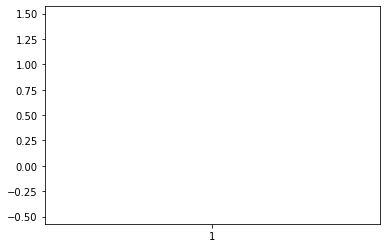

In [278]:
fig, ax = plt.subplots()

ax.boxplot(test['ConvertedComp'])

In [262]:

grp_country = df[df['Country'].isin(['South Africa', 'Germany', 'Japan'])]
grp_country = grp_country.dropna()
grp_country = grp_country.groupby('Country')
grp_country['ConvertedComp'].size()
#grp_country.isin(['South Africa', 'Germany', 'Japan'])
#grp_country = grp_country[grp_country in ['South Africa', 'Germany', 'Japan']]
#plt.boxplot(grp_country['ConvertedComp'])
#fig, ax = plt.subplots()


Country
Germany         184
Japan             9
South Africa     26
Name: ConvertedComp, dtype: int64

## Modeling

## Evaluation

## Deployment

In [2]:
import pandas as pd

In [42]:
df_original = pd.read_csv("./data/survey_results_public.csv")

In [43]:
df = df_original.copy()